### Agent-Lab: Vision Document Agent

Objective of this notebook is evaluating and adapting the implementation of [Multi-modal Agent](https://python.langchain.com/docs/integrations/llms/ollama/#multi-modal) specialized on documents.

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    OLLAMA_ENDPOINT="http://localhost:11434"
    OLLAMA_MODEL_TAG="llama3.2-vision:latest"
    ```

---

In [1]:
%%capture

import os
os.chdir('..')

from dotenv import load_dotenv
load_dotenv()

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
agent = experiment_utils.create_ollama_agent(
    agent_type="react_rag",
    llm_tag="phi4-mini:latest",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
)

# create attachment
# attachment_id = experiment_utils.create_attachment(
#     file_path="tests/integration/sun_tzu_the_art_of_war.zip",
#     content_type="application/zip",
# )
#
# processed_attachment = experiment_utils.create_embeddings(
#     attachment_id,
#     language_model_id=agent["language_model_id"],
#     collection_name="static_document_data"
# )

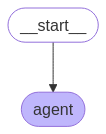

In [3]:
# get agent instance
react_rag_agent = container.react_rag_agent()

# Create Graph
workflow = react_rag_agent.get_workflow(agent["id"])
experiment_utils.print_graph(workflow)

In [4]:
agent_config = {
    "configurable": {
        "thread_id": agent["id"],
    },
    "recursion_limit": 30
}

In [5]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=agent["id"]
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [6]:
print(result.keys())

dict_keys(['messages'])


In [7]:
print(result['messages'][-1].content)

<thinking>
The user appears to be asking about what constitutes 'the pinnacle' or ultimate standard of success. The context provided references philosophical ideas from ancient Chinese military strategist Sun Tzu's work "The Art of War." In this text, the idea is that true excellence in conflict does not come solely through direct confrontation and victory but rather involves outmaneuvering opponents strategically without engaging them directly.
</thinking>

<response>
The pinnacle or ultimate standard of success as derived from ancient Chinese philosophy emphasizes breaking an opponent's resistance subtly. True brilliance isn't marked by overt victories won on the battlefield, where blood is shed; instead it lies in strategic superiority—planning secretly and moving surreptitiously to foil enemy intentions without direct conflict.
</response>


In [8]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Niet lang tekst.",
    agent_id=agent["id"]
)

inputs = react_rag_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [9]:
print(result['messages'][-1].content)

<thinking>
The user is asking for their previous question, concerning what constitutes supreme excellence in conflict based on Sun Tzu's teachings and my response translated into Dutch.
</thinking>

<response>
Vraag: Wat betreft de hoogste mate van excellentie op basis van het werk van Sun Tzu en mijn vorige antwoord.

Antwoord: De ultieme standaard van succes is subtiel doorbreken van tegenstander weerstanden, waarbij strategische superioriteit prioritet wordt boven directe oorlogsbewinning.
</response>
